In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [2]:
df_160325_nav = pd.read_excel('160325.xlsx')
df_161040_nav = pd.read_excel('161040.xlsx')
df_501082_nav = pd.read_excel('501082.xlsx')
df_506002_nav = pd.read_excel('506002.xlsx')

df_160325_nav['日期'] = pd.to_datetime(df_160325_nav['日期'])
df_161040_nav['日期'] = pd.to_datetime(df_161040_nav['日期'])
df_501082_nav['日期'] = pd.to_datetime(df_501082_nav['日期'])
df_506002_nav['日期'] = pd.to_datetime(df_506002_nav['日期'])

df_160325_nav.drop([151, 152], axis=0, inplace=True)
df_161040_nav.drop([153, 154], axis=0, inplace=True)
df_501082_nav.drop([417, 418], axis=0, inplace=True)
df_506002_nav.drop([153, 154], axis=0, inplace=True)

df_160325_nav.index = df_160325_nav['日期']
df_161040_nav.index = df_161040_nav['日期']
df_501082_nav.index = df_501082_nav['日期']
df_506002_nav.index = df_506002_nav['日期']

df_160325_nav.drop(['代码', '名称', '开盘价', '最高价', '最低价', '成交额(百万)', '成交量', '日期'], axis=1, inplace=True)
df_161040_nav.drop(['代码', '名称', '开盘价', '最高价', '最低价', '成交额(百万)', '成交量', '日期'], axis=1, inplace=True)
df_501082_nav.drop(['代码', '名称', '开盘价', '最高价', '最低价', '成交额(百万)', '成交量', '日期'], axis=1, inplace=True)
df_506002_nav.drop(['代码', '名称', '开盘价', '最高价', '最低价', '成交额(百万)', '成交量', '日期'], axis=1, inplace=True)


df_160325_nav.rename(columns={"收盘价":"160325 NAV"}, inplace=True)
df_161040_nav.rename(columns={"收盘价":"161040 NAV"}, inplace=True)
df_501082_nav.rename(columns={"收盘价":"501082 NAV"}, inplace=True)
df_506002_nav.rename(columns={"收盘价":"506002 NAV"}, inplace=True)

market = pd.concat([df_160325_nav, df_161040_nav, df_501082_nav, df_506002_nav], axis=1)
market.dropna(inplace=True)

In [3]:
df_160325_price_temp = pd.read_excel('160325_price.xlsx')
df_161040_price_temp = pd.read_excel('161040_price.xlsx')
df_501082_price_temp = pd.read_excel('501082_price.xlsx')
df_506002_price_temp = pd.read_excel('506002_price.xlsx')

df_160325_price_temp.drop(df_160325_price_temp.tail(2).index, inplace=True)
df_161040_price_temp.drop(df_161040_price_temp.tail(2).index, inplace=True)
df_501082_price_temp.drop(df_501082_price_temp.tail(2).index, inplace=True)
df_506002_price_temp.drop(df_506002_price_temp.tail(2).index, inplace=True)

df_160325_price = pd.DataFrame(df_160325_price_temp[['开盘价', '最高价', '最低价', '收盘价']].T.sum()/4)
df_160325_price.columns = ['160325 price']
df_161040_price = pd.DataFrame(df_161040_price_temp[['开盘价', '最高价', '最低价', '收盘价']].T.sum()/4)
df_161040_price.columns = ['161040 price']
df_501082_price = pd.DataFrame(df_501082_price_temp[['开盘价', '最高价', '最低价', '收盘价']].T.sum()/4)
df_501082_price.columns = ['501082 price']
df_506002_price = pd.DataFrame(df_506002_price_temp[['开盘价', '最高价', '最低价', '收盘价']].T.sum()/4)
df_506002_price.columns = ['506002 price']

df_160325_price.index = pd.to_datetime(df_160325_price_temp['日期'])
df_161040_price.index = pd.to_datetime(df_161040_price_temp['日期'])
df_501082_price.index = pd.to_datetime(df_501082_price_temp['日期'])
df_506002_price.index = pd.to_datetime(df_506002_price_temp['日期'])

market = pd.concat([market, df_160325_price, df_161040_price, df_501082_price, df_506002_price], axis=1)

market.dropna(inplace=True)

market['160325 return rate/year (%)'] = ((market['160325 NAV']/market['160325 price'])**(1/0.857534)-1)*100
market['501082 return rate/year (%)'] = ((market['501082 NAV']/market['501082 price'])**(1/0.90137)-1)*100
market['161040 return rate/year (%)'] = ((market['161040 NAV']/market['161040 price'])**(1/0.947945)-1)*100
market['506002 return rate/year (%)'] = ((market['506002 NAV']/market['506002 price'])**(1/0.986301)-1)*100
def cut(s):
    return s.split()[0]

lowest = pd.DataFrame({"lowest" : [market.iloc[i][['160325 return rate/year (%)', '501082 return rate/year (%)',
       '161040 return rate/year (%)', '506002 return rate/year (%)']].nsmallest(2).index[0] for i in range(market.shape[0])]})['lowest'].apply(cut)
second_lowest = pd.DataFrame({"second lowest" : [market.iloc[i][['160325 return rate/year (%)', '501082 return rate/year (%)',
       '161040 return rate/year (%)', '506002 return rate/year (%)']].nsmallest(2).index[1] for i in range(market.shape[0])]})['second lowest'].apply(cut)

lowest.index = market.index
second_lowest.index = market.index

market = pd.concat([market, lowest, second_lowest], axis=1)


In [57]:
market

,160325 NAV,161040 NAV,501082 NAV,506002 NAV,160325 price,161040 price,501082 price,506002 price,160325 return rate/year (%),501082 return rate/year (%),161040 return rate/year (%),506002 return rate/year (%),lowest,second lowest
日期,,,,,,,,,,,,,,
2021-01-28,1.1875,1.2808,2.0492,1.0780,1.07650,1.18050,1.90075,1.00450,12.124409,8.700867,8.983339,7.422384,506002,501082
2021-01-29,1.1914,1.2760,2.0505,1.0797,1.06125,1.15725,1.86600,0.99525,14.442272,11.027043,10.854444,8.608094,506002,161040
2021-02-01,1.2014,1.2951,2.0687,1.0788,1.06275,1.15700,1.86925,0.98375,15.373020,11.904617,12.631290,9.802580,506002,501082
2021-02-02,1.2238,1.3248,2.1154,1.0980,1.08025,1.18575,1.90250,0.97875,15.661380,12.488645,12.409151,12.363191,506002,161040
2021-02-03,1.2333,1.3171,2.1074,1.0915,1.09125,1.19450,1.90100,0.99050,15.338316,12.114848,10.856897,10.345585,506002,161040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26,1.2885,1.4618,2.3741,1.3031,1.13200,1.30925,2.10175,1.13175,16.300363,14.474395,12.329501,15.365949,161040,501082
2021-07-27,1.2473,1.4045,2.3041,1.2609,1.11075,1.30350,2.08050,1.13775,14.477527,11.991404,8.190840,10.982303,161040,506002
2021-07-28,1.2485,1.4106,2.2791,1.2659,1.09075,1.26650,2.04225,1.11125,17.060218,12.945502,12.038830,14.123107,161040,501082


In [5]:
from Portfolio import portfolio

In [6]:
position = {
    "160325":{
        "price":market.iloc[0]['160325 price'],
        "shares":1000000/3/market.iloc[0]['160325 price']
    }, 
    "161040":{
        "price":market.iloc[0]['161040 price'],
        "shares":1000000/3/market.iloc[0]['161040 price']
    }, 
    "501082":{
        "price":market.iloc[0]['501082 price'],
        "shares":1000000/3/market.iloc[0]['501082 price']
    }, 
    "506002":{
        "price":market.iloc[0]['506002 price'],
        "shares":0
    }
}

fee = 0.2/100

naive2 = portfolio(cash=0, position = position, cost = fee)

In [7]:
log_df = pd.DataFrame()

In [8]:
position = {
    "160325":{
        "price":market.iloc[0]['160325 price'],
        "shares":1000000/3/market.iloc[0]['160325 price']
    }, 
    "161040":{
        "price":market.iloc[0]['161040 price'],
        "shares":1000000/3/market.iloc[0]['161040 price']
    }, 
    "501082":{
        "price":market.iloc[0]['501082 price'],
        "shares":1000000/3/market.iloc[0]['501082 price']
    }, 
    "506002":{
        "price":market.iloc[0]['506002 price'],
        "shares":0
    }
}

fee = 0.2/100

naive2 = portfolio(cash=0, position = position, cost = fee)

log_df = pd.DataFrame()

trade_count = 0

for index, row in market.iterrows():
    trade = 0
    print(index.strftime('%Y-%m-%d'))
    
    today_prices = [row['160325 price'], row['161040 price'], row['501082 price'], row['506002 price']]
    naive2.update_prices(today_prices)
       
    min_ticker = None
    min_benchmark = 100
    zero_holding_ticker = None
        
    for ticker, info in naive2.position.items():
        if row[ticker + ' return rate/year (%)'] < min_benchmark and info['shares'] != 0:
            min_ticker = ticker
            min_benchmark = row[ticker + ' return rate/year (%)']
        if info['shares'] == 0:
            zero_holding_ticker = ticker
            
    if row[zero_holding_ticker + ' return rate/year (%)'] - row[min_ticker + ' return rate/year (%)'] >= 1:
        trade = 1
        sell_cost = naive2.position[min_ticker]['shares'] * naive2.position[min_ticker]['price'] * fee
        naive2.sell(min_ticker, naive2.position[min_ticker]['shares'], sell_cost)
        buy_cost = naive2.cash * fee
        buy_shares = (naive2.cash - buy_cost)/row[zero_holding_ticker + ' price']
        naive2.buy(zero_holding_ticker, buy_shares, buy_cost)
    
    naive2.get_balance()
    capital = naive2.get_capital()
    print("Capital: ", capital)
    holding_percent = naive2.holding_percent()
    print("Percentage: ", holding_percent)
    log_df = log_df.append(pd.Series([
        naive2.position['160325']['shares'], 
        naive2.position['161040']['shares'], 
        naive2.position['501082']['shares'], 
        naive2.position['506002']['shares'],
        capital,
        trade],
        index = ['160325 shares', '161040 shares', '501082 shares', '506002 shares', 'Capital', 'Trade']), ignore_index=True)
    
    trade_count += trade
    print('--'*40)
    

2021-01-28
Cash:     0
160325: 
      Price: 1.0765
      Shares 309645.4559529339
161040: 
      Price: 1.1804999999999999
      Shares 282366.22899901174
501082: 
      Price: 1.90075
      Shares 175369.37173922575
506002: 
      Price: 1.0045000000000002
      Shares     0
Capital:  1000000.0
Percentage:  {'160325 holding (%)': 33.33333333333333, '161040 holding (%)': 33.33333333333333, '501082 holding (%)': 33.33333333333333, '506002 holding (%)': 0.0}
--------------------------------------------------------------------------------
2021-01-29
Cash:     0
160325: 
      Price: 1.0612499999999998
      Shares 309645.4559529339
161040: 
      Price: 1.15725
      Shares 282366.22899901174
501082: 
      Price: 1.8659999999999999
      Shares 175369.37173922575
506002: 
      Price: 0.9952499999999999
      Shares     0
Capital:  982618.8063045526
Percentage:  {'160325 holding (%)': 33.4423927184843, '161040 holding (%)': 33.25484067804701, '501082 holding (%)': 33.30276660346869, '50

--------------------------------------------------------------------------------
2021-05-26
Cash:   0.0
160325: 
      Price:  1.06
      Shares 309645.4559529339
161040: 
      Price: 1.15225
      Shares 294316.4579015862
501082: 
      Price: 1.83125
      Shares 179881.1756811506
506002: 
      Price: 0.9562499999999999
      Shares   0.0
Capital:  996757.7248933197
Percentage:  {'160325 holding (%)': 32.92918380394182, '161040 holding (%)': 34.02292554626536, '501082 holding (%)': 33.04789064979282, '506002 holding (%)': 0.0}
--------------------------------------------------------------------------------
2021-05-27
Cash:   0.0
160325: 
      Price: 1.0645
      Shares 309645.4559529339
161040: 
      Price:  1.16
      Shares 294316.4579015862
501082: 
      Price: 1.8355000000000001
      Shares 179881.1756811506
506002: 
      Price: 0.96375
      Shares   0.0
Capital:  1001196.5769904901
Percentage:  {'160325 holding (%)': 32.922364642186444, '161040 holding (%)': 34.099905953

--------------------------------------------------------------------------------
2021-07-14
Cash:   0.0
160325: 
      Price: 1.1605
      Shares 309645.4559529339
161040: 
      Price: 1.24375
      Shares 310416.8190050295
501082: 
      Price: 2.0755
      Shares   0.0
506002: 
      Price: 1.0732499999999998
      Shares 352891.5863805056
Capital:  1124165.3653537626
Percentage:  {'160325 holding (%)': 31.965364056585948, '161040 holding (%)': 34.34378344470789, '501082 holding (%)': 0.0, '506002 holding (%)': 33.69085249870618}
--------------------------------------------------------------------------------
2021-07-15
Cash:   0.0
160325: 
      Price: 1.16275
      Shares 309645.4559529339
161040: 
      Price: 1.23675
      Shares 310416.8190050295
501082: 
      Price: 2.04375
      Shares   0.0
506002: 
      Price: 1.06375
      Shares 352891.5863805056
Capital:  1119336.679826007
Percentage:  {'160325 holding (%)': 32.165501265020595, '161040 holding (%)': 34.29781296581347, 

In [9]:
log_df.index = market.index

In [10]:
market_performance = pd.concat([market, log_df], axis=1)

In [11]:
market_performance

,160325 NAV,161040 NAV,501082 NAV,506002 NAV,160325 price,161040 price,501082 price,506002 price,160325 return rate/year (%),501082 return rate/year (%),161040 return rate/year (%),506002 return rate/year (%),lowest,second lowest,160325 shares,161040 shares,501082 shares,506002 shares,Capital,Trade
日期,,,,,,,,,,,,,,,,,,,,
2021-01-28,1.1875,1.2808,2.0492,1.0780,1.07650,1.18050,1.90075,1.00450,12.124409,8.700867,8.983339,7.422384,506002,501082,309645.455953,282366.228999,175369.371739,0.000000,1.000000e+06,0.0
2021-01-29,1.1914,1.2760,2.0505,1.0797,1.06125,1.15725,1.86600,0.99525,14.442272,11.027043,10.854444,8.608094,506002,161040,309645.455953,282366.228999,175369.371739,0.000000,9.826188e+05,0.0
2021-02-01,1.2014,1.2951,2.0687,1.0788,1.06275,1.15700,1.86925,0.98375,15.373020,11.904617,12.631290,9.802580,506002,501082,309645.455953,282366.228999,175369.371739,0.000000,9.835826e+05,0.0
2021-02-02,1.2238,1.3248,2.1154,1.0980,1.08025,1.18575,1.90250,0.97875,15.661380,12.488645,12.409151,12.363191,506002,161040,309645.455953,282366.228999,175369.371739,0.000000,1.002950e+06,0.0
2021-02-03,1.2333,1.3171,2.1074,1.0915,1.09125,1.19450,1.90100,0.99050,15.338316,12.114848,10.856897,10.345585,506002,161040,309645.455953,282366.228999,175369.371739,0.000000,1.008564e+06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26,1.2885,1.4618,2.3741,1.3031,1.13200,1.30925,2.10175,1.13175,16.300363,14.474395,12.329501,15.365949,161040,501082,309645.455953,0.000000,188636.736224,352891.586381,1.146371e+06,0.0
2021-07-27,1.2473,1.4045,2.3041,1.2609,1.11075,1.30350,2.08050,1.13775,14.477527,11.991404,8.190840,10.982303,161040,506002,309645.455953,0.000000,188636.736224,352891.586381,1.137900e+06,0.0
2021-07-28,1.2485,1.4106,2.2791,1.2659,1.09075,1.26650,2.04225,1.11125,17.060218,12.945502,12.038830,14.123107,161040,501082,309645.455953,0.000000,188636.736224,352891.586381,1.115140e+06,0.0


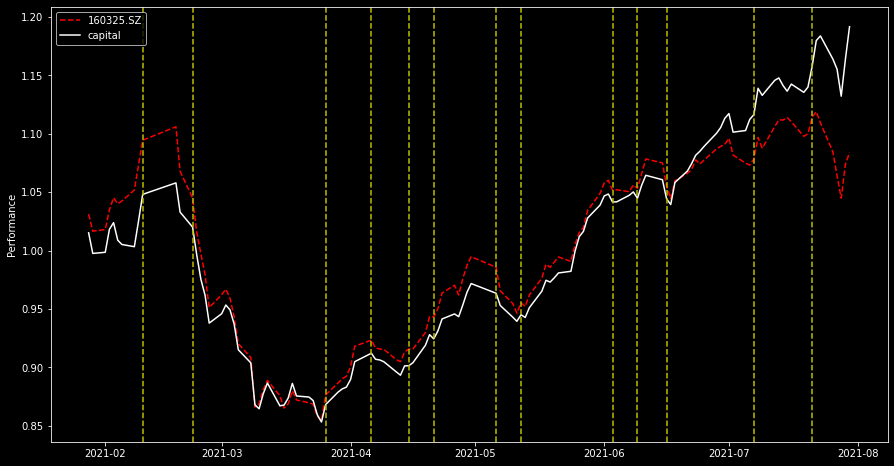

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

ax.plot(market_performance.index, market_performance['160325 price']/market_performance['160325 price'].mean(), color='r', ls='--', label='160325.SZ')
ax.plot(market_performance.index, market_performance['Capital']/market_performance['Capital'].mean(), 'w', label='capital')
ax.set_ylabel("Performance")
ax.legend(prop={'size':10})

for index, row in market_performance.iterrows():
    if row['Trade'] == 1:
        ax.axvline(x=index, color='y', ls='--')
        
        

In [50]:
market_performance['161040 price'].std()

0.08313491876273957

In [14]:
initial = market_performance.iloc[0][['160325 price', '161040 price', '501082 price', '506002 price', 'Capital']]
final = market_performance.iloc[-1][['160325 price', '161040 price', '501082 price', '506002 price', 'Capital']]
fund_performance = pd.DataFrame(((final - initial)/initial * 100).sort_values())
fund_performance.columns = ['Performance (%)']
fund_performance.index = fund_performance.index

fund_performance

,Performance (%)
160325 price,5.10915
501082 price,12.50822
161040 price,13.405337
Capital,17.370448
506002 price,18.466899
